In [1]:
load_from_config = True
raw_data_folder = ""
preprocessed_data_folder = ""

In [2]:
import yaml
import pandas as pd

In [3]:
with open('../config.yaml') as file:
  params= yaml.safe_load(file)

# in case of a automatic run
if not load_from_config:
    params['raw_data_folder'] = raw_data_folder
    params['preprocessed_data_folder'] = preprocessed_data_folder

preprocessed_data_folder = params['data_folder'] + params['preprocessed_data_folder']

In [4]:
df_tracks = pd.read_pickle(preprocessed_data_folder + 'pp_merged.pkl')
df_orientations = pd.read_pickle(preprocessed_data_folder + 'pp_orientations.pkl')

## Count pedestrians in scenario

In [5]:
for index, row in df_orientations.iterrows():
    start_time = row["timestamp_begin"]
    end_time = row["timestamp_end"]

    aux=df_orientations[(df_orientations["timestamp_begin"] >= start_time) & 
                        (df_orientations["timestamp_end"] <= end_time)]

    df_orientations.at[index, "pedestrian_count"] = aux.shape[0]

<Axes: ylabel='Frequency'>

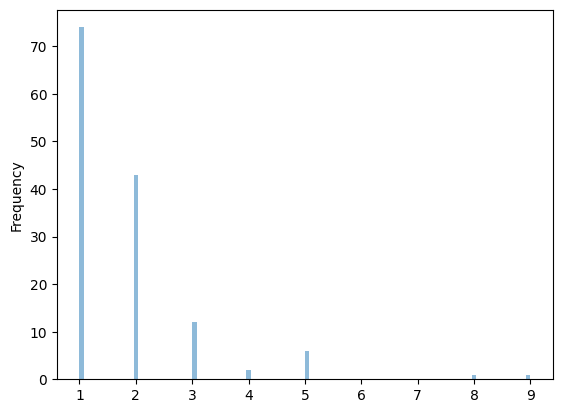

In [6]:
df_orientations.pedestrian_count.plot.hist(bins=100, alpha=0.5)

In [7]:
pd.to_pickle(df_orientations, preprocessed_data_folder + params['preprocessed_file_labels']+ "orientations.pkl")